# BoomBikes - Company and Business Goal


BoomBikes is a bike sharing system and due to recent market turnmoils and pandenmic the company wants to understand the importance and role of various factors that define company's revenue. Once company understand the demand through a model of various factors, the company will work on improving these factors to cater the demand by targeting
people's needs and thus increasing their revenue.

## Step 1 - Loading and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_data = pd.read_csv('day.csv')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check how many columns contain null values and use imputation if required.
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mapping variables Season, Weathersit, Month and Weekday to their corresponding labels to remove ordinality 

In [8]:
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3: 'Light Snow', 4:'Heavy Rain + Snow + Fog'})
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                           7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_data['weekday'] = bike_data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2 - Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

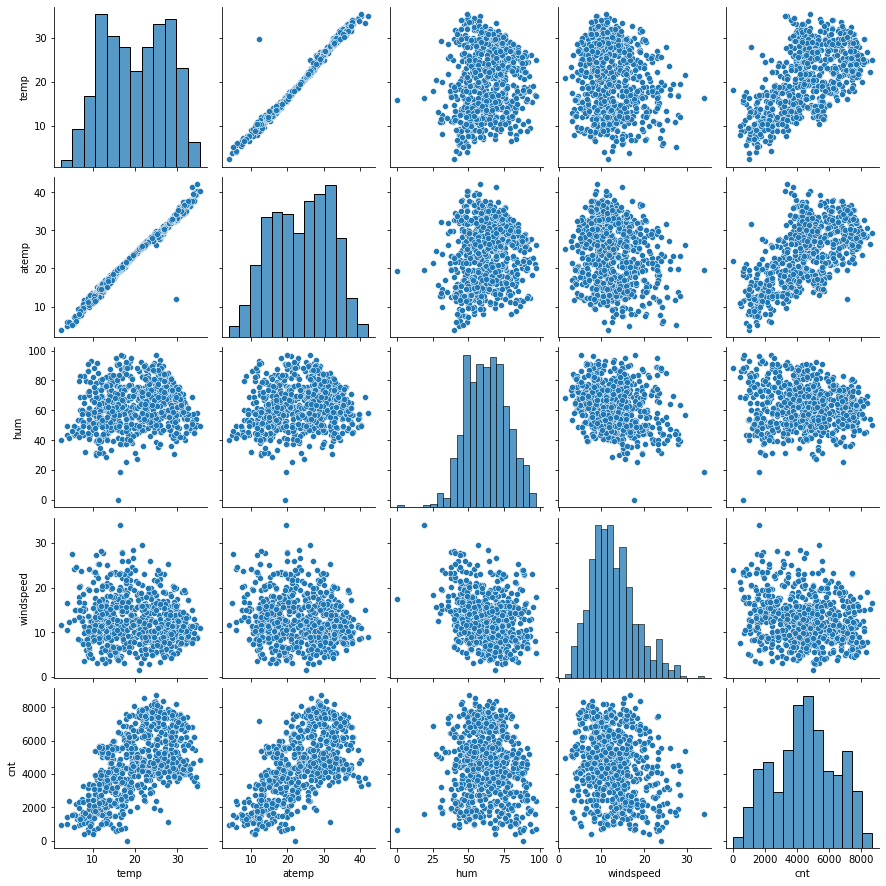

In [10]:
# Pairplot for numeric variables
sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

### Conlusion from analyzing above graphs is that temp is highly correlated to Count (Bike rentals) variable.

### Visualising Categorical varibales

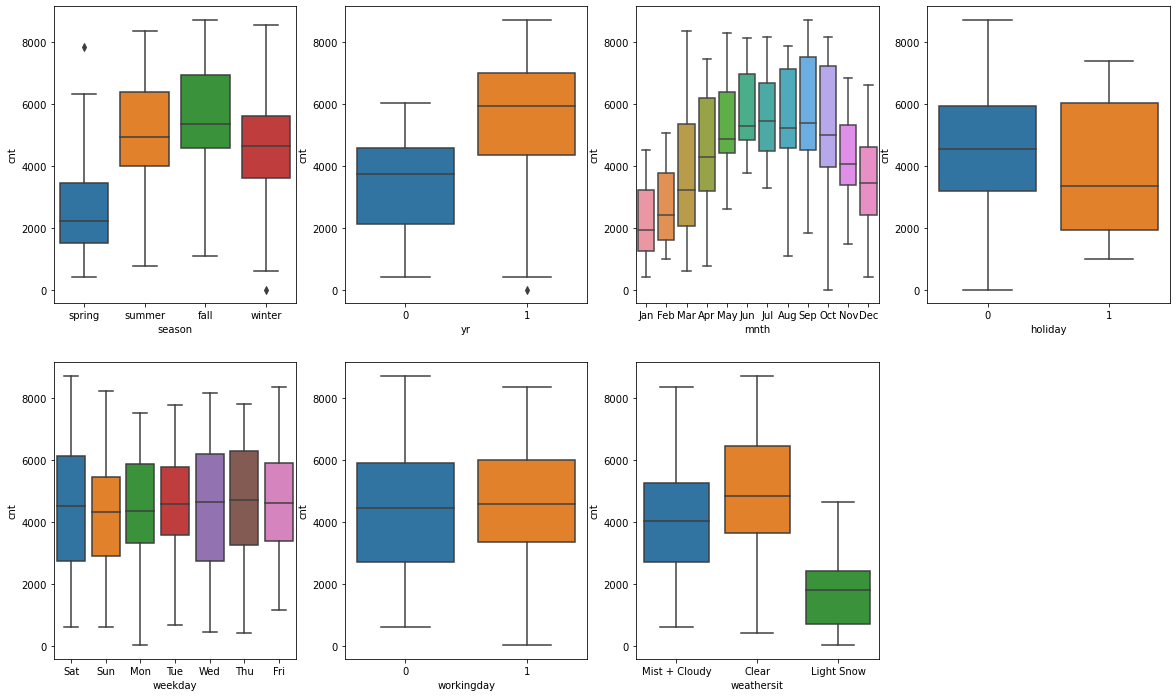

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=bike_data)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=bike_data)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=bike_data)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bike_data)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bike_data)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bike_data)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_data)
plt.show()

### Following inferences can be made from above graph:
    Season - Rental count is maximum during Fall with highest median.
    Year - There was significant increase in 2019 compared to 2018 for rentals.
    Month - August, September and October are the months with max number of rentals.
    Weather - Clear and Partly cloudy is best for bike rentals.
    Weekday - Saturday, Wednesday and Thursday have the most number of Bike rentals.
    

In [12]:
# Dropping remaining variables that are not required for this analysis:
# Instant (Just a row number), dteday (Date of rental, required info already captured through other variables), Casual
# and Registered are just breakdown of Count (Dependent variable) so not required)
bike_data.drop(['instant','dteday','atemp','casual','registered'],inplace=True,axis=1)
# Left with 4 + 7 = 11 variables
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


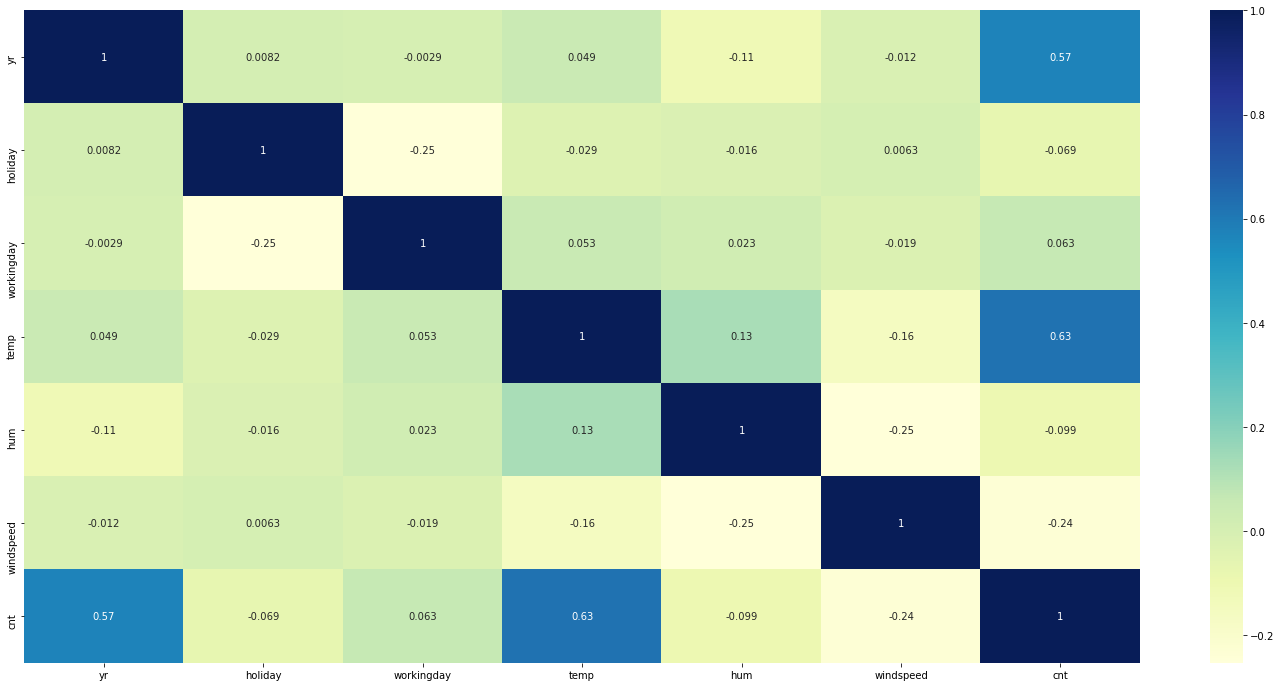

In [13]:
# Heatmap to capture the correlation among all variables.
plt.figure(figsize=(25,12))
sns.heatmap(bike_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Step 3 - Data Preparation

In [14]:
# Creating Dummy variables.
# Season, Month, Weekday and Weather are the 4 categorical variables left, need to create dummy for them with drop_first
# enabled so extra column is not accounted
seasons = pd.get_dummies(bike_data['season'], drop_first=True)
months = pd.get_dummies(bike_data['mnth'], drop_first=True)
weekdays = pd.get_dummies(bike_data['weekday'], drop_first=True)
weathers = pd.get_dummies(bike_data['weathersit'], drop_first=True)


In [15]:
bike_data=pd.concat([seasons,months,weekdays,weathers,bike_data],axis=1)
bike_data.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [16]:
# Drop original Categorical variables as Dummy columns have been created.
bike_data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike_data.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


## Step 4 - Model Building

In [17]:
# Splitting the Dataset in 70/30 ratio for traing and testing respectively
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike_data, train_size=0.7, random_state=100)

In [18]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [19]:
# Rescaling the continous variables using Min-Max scaling.
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
#Creating a list of Continous variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit on training data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


In [21]:
# Verify the data after scaling.
bike_train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.158824,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.365870,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y values for Model training

In [22]:
# take the cnt variable out as dependent variable
y_train = bike_train.pop('cnt')
X_train = bike_train

In [23]:
# Building the model using Feature selection and Linear Model from SKLearn library.
# Importing all necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [24]:
# Using RFE to keep output variables count as 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [26]:
# List of 15 variables retained for training.
col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [27]:
X_train_rfe = X_train[col]
X_train_rfe

,spring,summer,winter,Jan,Jul,Sep,Sat,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,0,0,0,1,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,1,0,0,0,0,0,0,1,0,0,1,0.462664,0.759870,0.529881


In [28]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [29]:
# Create the model
lm = sm.OLS(y_train, X_train_rfe)

In [30]:
# Fit the model
lm_model = lm.fit()

In [31]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.22e-191
Time:                        19:53:26   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Creating a Dataframe consisting of all feature variables and their respective VIF score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [33]:
# Display vif values
vif

,Features,VIF
0,const,84.60
1,spring,5.08
13,temp,3.89
3,winter,3.59
2,summer,2.65
14,hum,1.91
12,workingday,1.88
7,Sat,1.78
4,Jan,1.57
9,Mist + Cloudy,1.57


Since the variable Jan has highest p-value among all and a low VIF it's safer to drop Jan

In [34]:
# Drop Jan column from Dataset
X_train_rmJan = X_train_rfe.drop(['Jan'],axis=1)

In [35]:
# Build the Model again 
lm = sm.OLS(y_train,X_train_rmJan)
lm_model = lm.fit()
print(lm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.11e-191
Time:                        19:54:38   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [36]:
# Drop the constant term 
X_train_rmJan = X_train_rmJan.drop(['const'], axis=1)

In [37]:
# Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rmJan.columns
vif['VIF'] = [variance_inflation_factor(X_train_rmJan.values, i) for i in range(X_train_rmJan.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,hum,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
0,spring,4.24
2,winter,3.42
1,summer,2.85
7,Mist + Cloudy,2.29
8,yr,2.08
5,Sat,1.97


Since Humidity has a very high VIF, it can be dropped.

In [38]:
X_train_rmHum = X_train_rmJan.drop(['hum'],axis=1)
X_train_rmHum = sm.add_constant(X_train_rmHum)
# Build the Model again
lm = sm.OLS(y_train,X_train_rmHum)
lm_model = lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.28e-188
Time:                        19:55:39   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

In [39]:
# Drop the constant term 
X_train_rmHum = X_train_rmHum.drop(['const'], axis=1)

In [40]:
# Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rmHum.columns
vif['VIF'] = [variance_inflation_factor(X_train_rmHum.values, i) for i in range(X_train_rmHum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
0,spring,2.49
1,summer,2.34
8,yr,2.07
2,winter,1.98
5,Sat,1.96
3,Jul,1.58
7,Mist + Cloudy,1.57


Since Holiday has high p-value, it can be dropped.

In [41]:
X_train_rmHoliday = X_train_rmHum.drop(['holiday'],axis=1)
X_train_rmHoliday = sm.add_constant(X_train_rmHoliday)
# Build the Model again
lm = sm.OLS(y_train,X_train_rmHoliday)
lm_model = lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.12e-189
Time:                        19:56:02   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

In [42]:
# Drop the constant term 
X_train_rmHoliday = X_train_rmHoliday.drop(['const'], axis=1)

In [43]:
# Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rmHoliday.columns
vif['VIF'] = [variance_inflation_factor(X_train_rmHoliday.values, i) for i in range(X_train_rmHoliday.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
0,spring,2.38
1,summer,2.32
8,yr,2.07
2,winter,1.91
5,Sat,1.83
3,Jul,1.58
7,Mist + Cloudy,1.57


In [44]:
# Dropping windspeed since it has high VIF with negative cofficient.
X_train_rmWindspeed = X_train_rmHoliday.drop(['windspeed'],axis=1)
X_train_rmWindspeed = sm.add_constant(X_train_rmWindspeed)
# Build the Model again
lm = sm.OLS(y_train,X_train_rmWindspeed)
lm_model = lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.94e-182
Time:                        21:07:42   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248

In [45]:
# Drop the constant term 
X_train_rmWindspeed = X_train_rmWindspeed.drop(['const'], axis=1)

In [46]:
# Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rmWindspeed.columns
vif['VIF'] = [variance_inflation_factor(X_train_rmWindspeed.values, i) for i in range(X_train_rmWindspeed.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,temp,6.03
9,workingday,4.63
8,yr,2.07
1,summer,2.06
5,Sat,1.81
0,spring,1.78
2,winter,1.73
3,Jul,1.58
7,Mist + Cloudy,1.57
4,Sep,1.34


In [47]:
# Dropping July with high p-value to see impact on model.
X_train_rmJuly = X_train_rmWindspeed.drop(['Jul'],axis=1)
X_train_rmJuly = sm.add_constant(X_train_rmJuly)
# Build the Model again
lm = sm.OLS(y_train,X_train_rmJuly)
lm_model = lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.10e-182
Time:                        21:14:05   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964

In [48]:
# Drop the constant term 
X_train_rmJulyFinal = X_train_rmJuly.drop(['const'], axis=1)

In [49]:
# Calculate the VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rmJulyFinal.columns
vif['VIF'] = [variance_inflation_factor(X_train_rmJulyFinal.values, i) for i in range(X_train_rmJulyFinal.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,yr,2.07
4,Sat,1.81
1,summer,1.75
0,spring,1.70
2,winter,1.59
6,Mist + Cloudy,1.57
3,Sep,1.23
5,Light Snow,1.07


#### Now our p-values are very minimal and the VIF scores are under 5, we can consider this as our final model

In [50]:
y_train_pred = lm_model.predict(X_train_rmJuly)

Text(0.5, 1.0, 'Residual Analysis')

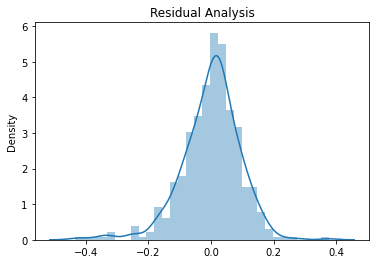

In [51]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Residual Analysis')

#### Residual graph depits a normal distribution curve.

## Step 5 - Predictions and Evaluation of Model

In [52]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit on training data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [53]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Tue,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.168182,0.100000,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.374881,0.300684,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [54]:
X_test_new = X_test[X_train_rmJulyFinal.columns]
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [55]:
y_pred = lm_model.predict(X_test_new)

In [56]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print(r2)

0.8115083592040954


## Step 6 - Model Evaluation

Text(0, 0.5, 'y_pred')

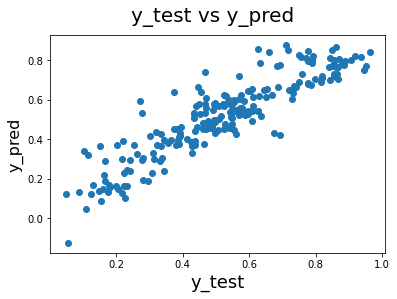

In [57]:
# Plotting y_test and y_pred to understand the data spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

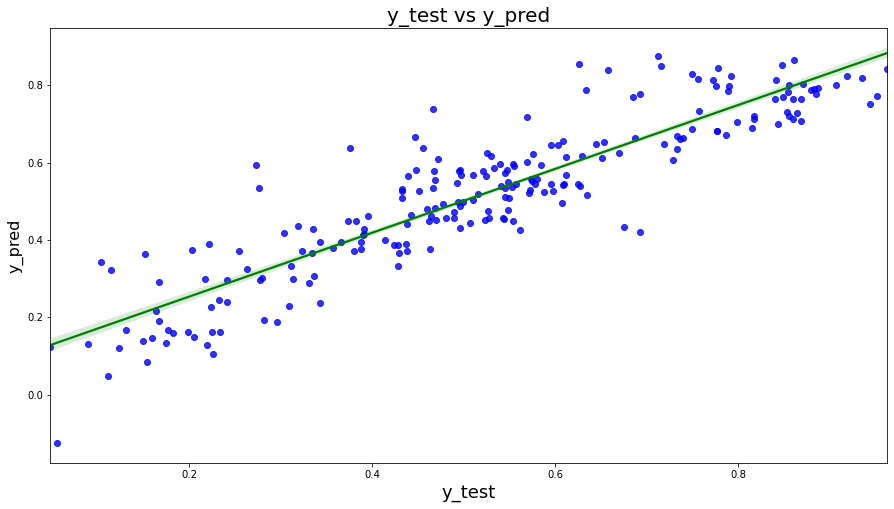

In [58]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "green"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                       
plt.show()


#### Equation of the best fitted line is:
##### cnt =  0.0902 - 0.0650 * spring + 0.0527 * summer + 0.0970 * winter + 0.0916 * sep + 0.0645 * sat - 0.3041 * lightsnow - 0.0786 * mistcloudy + 0.2334 * yr + 0.0566 * workingday + 0.4914 * temp   